# Assignment 5 #

In [1]:
import pandas as pd

In [3]:
unemployment = pd.read_csv("UNRATE.csv")
inflation = pd.read_csv("T10YIE.csv")

In [11]:
unemployment['DATE'].dtype

dtype('O')

In [5]:
inflation.head()

,DATE,T10YIE
0,2008-09-08,1.98
1,2008-09-09,1.93
2,2008-09-10,1.95
3,2008-09-11,1.97
4,2008-09-12,1.95


In [12]:
unemployment['DATE'] = pd.to_datetime(unemployment['DATE'])
inflation['DATE'] = pd.to_datetime(inflation['DATE'])

In [15]:
unemployment.sort_values(by = 'DATE').head(20)

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


In [16]:
df = unemployment.merge(inflation, on="DATE", how="left")

In [17]:
df.head()

,DATE,UNRATE,T10YIE
0,1948-01-01,3.4,NaN
1,1948-02-01,3.8,NaN
2,1948-03-01,4.0,NaN
3,1948-04-01,3.9,NaN
4,1948-05-01,3.5,NaN


In [18]:
df.dropna(inplace=True)

In [32]:
df['T10YIE'] = df['T10YIE'].str.strip()

In [34]:
df = df[df['T10YIE'] != '.']

In [ ]:
df['T10YIE'] = df['T10YIE'].astype('float')

In [37]:
df.describe

<bound method NDFrame.describe of           DATE  UNRATE  T10YIE
729 2008-10-01     6.5    1.51
731 2008-12-01     7.3    0.34
735 2009-04-01     9.0    1.31
736 2009-05-01     9.4    1.41
737 2009-06-01     9.5    1.91
..         ...     ...     ...
856 2019-05-01     3.6    1.93
858 2019-07-01     3.7    1.69
859 2019-08-01     3.7    1.70
861 2019-10-01     3.6    1.52
862 2019-11-01     3.6    1.59

[87 rows x 3 columns]>

In [38]:
print(f"Correlation between unemployment rate and inflation: {df['UNRATE'].corr(df['T10YIE'])}")

Correlation between unemployment rate and inflation: 0.28597575434797057


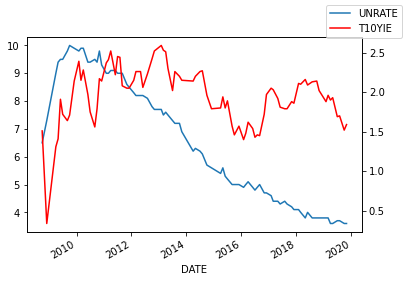

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = df.plot(x="DATE", y="UNRATE", legend=False)
ax2 = ax.twinx()
df.plot(x="DATE", y="T10YIE", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()